<a href="https://colab.research.google.com/github/yekta92/deep-learning/blob/main/pima_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import os
os.chdir("/content/gdrive/MyDrive")
!ls


 0152.jpg			 r_5_210605190433.rar
 1621755382-conf-fa.pdf		'result pregnant.pdf'
 4_6051093476743841928.pdf	 resume..pdf
 6S191_MIT_DeepLearning_L1.pdf	 sf_Q22.pdf
'Colab Notebooks'		 sf_Q51.pdf
'Essential words.pdf'		'T1, academic, updated.PDF'
 ESWA-S-22-05057.pdf		'task 2 updated.PDF'
 hw3_code.tar			'writing 1-paragraph eslah.pdf'
'IELTS Listening Direct.pdf'	"پروپوزال.pdf'.pdf"
 paper-f.pdf			 چکیده.gdoc
 Pima.csv			'یکتا نصیری پور- هزینه شرکت.gdoc'
 PrintResult.pdf		'یکتا نصیری پور- هزینه شرکت.pdf'
'r_5_210605190433 (1).rar'


In [24]:
file_id = "/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv"
import pandas as pd
df=pd.read_csv(file_id)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
Label=df["Outcome"]                              
print(Label.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [31]:
#normalization(-1,1)
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

df_std = std_scale.transform(df[['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])


In [33]:
df_std.size
print(df_std)

[[ 0.63994726  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505 -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505  0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]


In [34]:
data_pima = pd. DataFrame(df_std, columns=['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

data_pima.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_pima,Label,test_size=0.2, shuffle=True, random_state = 10)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)
#print(X_test)
#print(X_train)

X_train: (614, 7)
y_train: (614,)
X_test: (154, 7)
y_test: (154,)


In [45]:

x_val=X_train[: 114]
y_val=y_train[: 114]
print('x_val:',x_val.shape)
print('y_val:',y_val.shape)


x_val: (114, 7)
y_val: (114,)


**MLP Model**

In [46]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(3,2,2),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01)

# Fit data onto the model
Net = clf.fit(X_train,y_train)

0.7198697068403909
0.6623376623376623


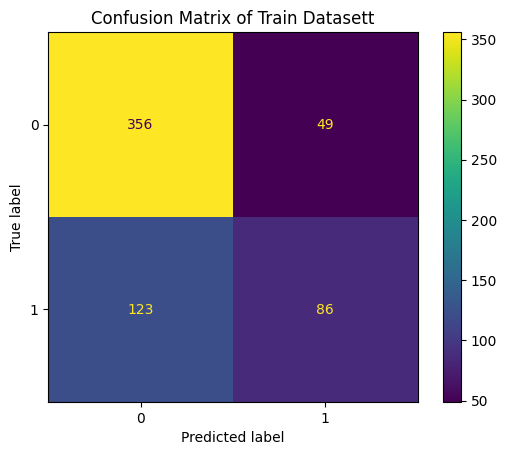

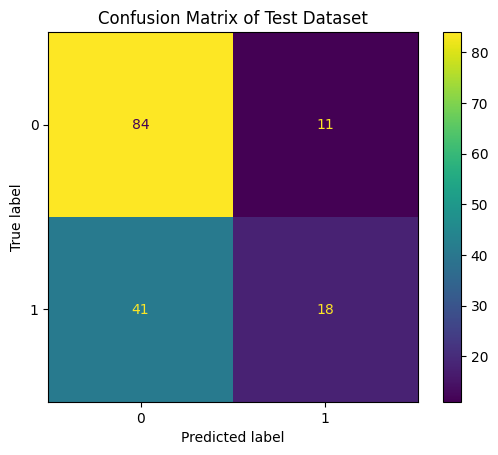

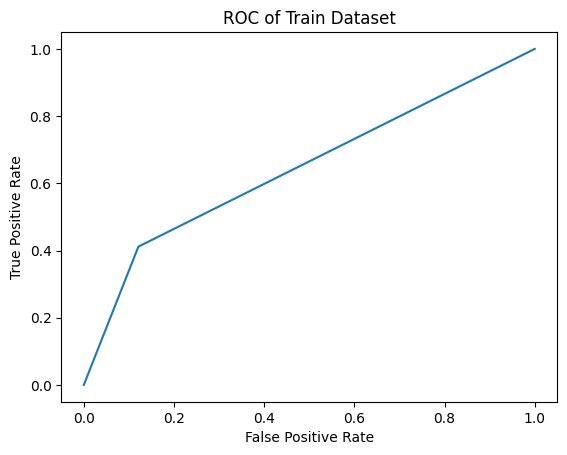

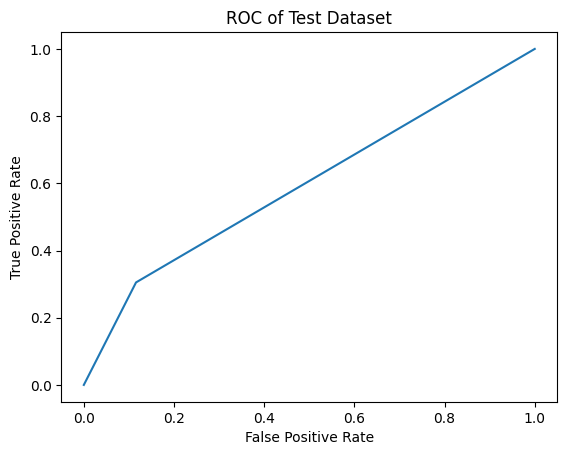

In [47]:
ypred_Tr =Net.predict(X_train)
ypred_Te =Net.predict(X_test)

# Import accuracy score 
from sklearn import metrics
import matplotlib.pyplot as plt

# Calcuate accuracy
ACC_Tr = metrics.accuracy_score(y_train,ypred_Tr)
ACC_Te = metrics.accuracy_score(y_test,ypred_Te)
print(ACC_Tr)
print(ACC_Te)

cm_Te= metrics.confusion_matrix(y_test,ypred_Te)
cm_Tr= metrics.confusion_matrix(y_train,ypred_Tr)

cm_display_Te = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_Te, display_labels = [0, 1])
cm_display_Tr = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_Tr, display_labels = [0, 1])

cm_display_Tr.plot()
plt.title('Confusion Matrix of Train Datasett')
plt.show()
cm_display_Te.plot()
plt.title('Confusion Matrix of Test Dataset')

plt.show()


fprTe, tprTe, _ = metrics.roc_curve(y_test,  ypred_Te)
fprTr, tprTr, _ = metrics.roc_curve(y_train,  ypred_Tr)

plt.plot(fprTr,tprTr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Train Dataset')
plt.show()

plt.plot(fprTe,tprTe)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Test Dataset')
plt.show()

**SVM** **model**

In [14]:
#model
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

**LinearRegression**

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)

In [16]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(X_test)
y_pred=np.round_(y_pred)
type(y_pred)
#print(y_pred)

score= metrics.accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[95  0]
 [ 1 58]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        59

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [17]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(X_test)
y_pred2=np.round_(y_pred2)
type(y_pred2)
#print(y_pred2)

score= metrics.accuracy_score(y_test,y_pred2)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[95  0]
 [ 0 59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        59

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



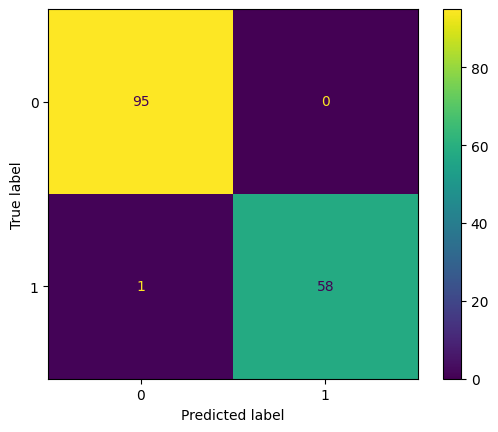

In [18]:
import sklearn
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
cm=sklearn.metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

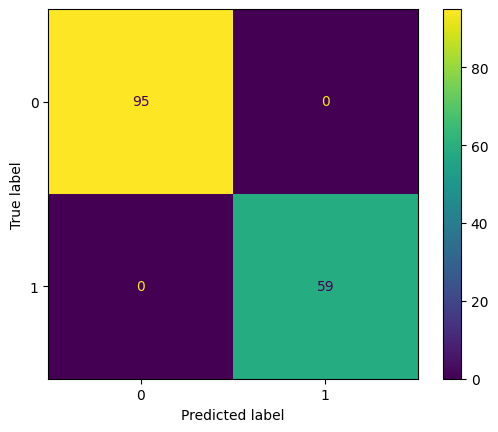

In [19]:
import sklearn
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
cm=sklearn.metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

Accuracy score DecisionTreeClassifier : 0.9935064935064936
Confusion matrix : 
 [[95  0]
 [ 1 58]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        59

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='predicted label', ylabel='true label'>)


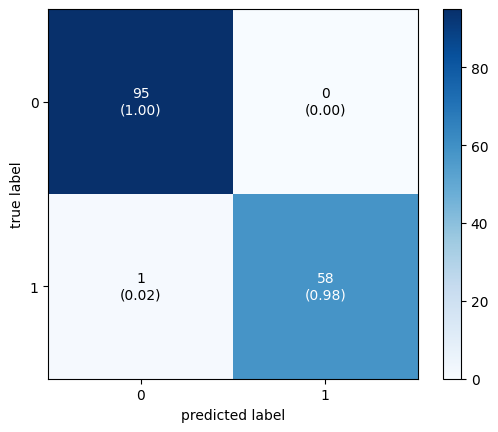

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
pred1 = model.predict(X_test)
accuracy1 = accuracy_score(y_test,pred1)
cm1 = confusion_matrix(y_test,pred1)
print("Accuracy score DecisionTreeClassifier : {}".format(accuracy1))
print("Confusion matrix : \n {}".format(cm1))
print(classification_report(y_test,pred1))
print(plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True))